In [1]:
# Preparação dos dados
import os

import numpy as np
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sns.set_theme()

In [2]:
## Importar dataset

data_path = '../data/' if os.path.exists(
    '../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset-densidade.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente númerico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ano                                        5187 non-null   int64  
 1   mes                                        5187 non-null   int64  
 2   energia_ativa_baixa_tensao_kwh             5187 non-null   int64  
 3   energia_ativa_alta_tensao_kwh              5187 non-null   int64  
 4   cpes_domestico_baixa_tensao                5187 non-null   int64  
 5   cpes_domestico_alta_tensao                 5187 non-null   int64  
 6   cpes_iluminacao_publica_baixa_tensao       5187 non-null   int64  
 7   cpes_iluminacao_publica_alta_tensao        5187 non-null   int64  
 8   cpes_nao_domestico_baixa_tensao            5187 non-null   int64  
 9   cpes_nao_domestico_alta_tensao             5187 non-null   int64  
 10  cpes_outros_baixa_tensao

### Cast de 'densidade_populacional_pessoas_km2' para int64

In [4]:
merged_df['densidade_populacional_pessoas_km2'] = merged_df['densidade_populacional_pessoas_km2'].round().astype(np.int64)
merged_df.info()

merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        5187 non-null   int64
 1   mes                                        5187 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             5187 non-null   int64
 3   energia_ativa_alta_tensao_kwh              5187 non-null   int64
 4   cpes_domestico_baixa_tensao                5187 non-null   int64
 5   cpes_domestico_alta_tensao                 5187 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       5187 non-null   int64
 7   cpes_iluminacao_publica_alta_tensao        5187 non-null   int64
 8   cpes_nao_domestico_baixa_tensao            5187 non-null   int64
 9   cpes_nao_domestico_alta_tensao             5187 non-null   int64
 10  cpes_outros_baixa_tensao                   5187 

,ano,mes,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_iluminacao_publica_alta_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,2022,8,5908716,5891542,20260,0,293,0,4318,134,83,0,22194,2,48
1,2022,9,5319528,6159115,20270,0,293,0,4311,134,81,0,22596,2,48
2,2022,10,5431060,6360625,20280,0,293,0,4302,134,81,0,23126,2,48
3,2022,11,5845742,5961164,20291,0,293,0,4308,134,80,0,23938,2,48
4,2022,12,6780793,5272178,20297,0,294,0,4312,134,82,0,24420,2,48


### Separar os datasets em dois:
    - Um para baixa e outro para alta tensão

In [5]:
# Selecionar as variáveis de baixa tensão
baixa_tensao_columns = ['ano', 'mes', 'energia_ativa_baixa_tensao_kwh', 
                        'cpes_domestico_baixa_tensao', 'cpes_iluminacao_publica_baixa_tensao',
                        'cpes_nao_domestico_baixa_tensao', 'cpes_outros_baixa_tensao',
                        'cpes_mobilidade_eletrica_nao_baixa_tensao', 'cpes_mobilidade_eletrica_sim_baixa_tensao', 'densidade_populacional_pessoas_km2']

# Selecionar as variáveis de alta tensão
alta_tensao_columns = ['ano', 'mes', 'energia_ativa_alta_tensao_kwh',
                       'cpes_domestico_alta_tensao',
                       'cpes_nao_domestico_alta_tensao', 'cpes_outros_alta_tensao', 'densidade_populacional_pessoas_km2']

# Criar os datasets separados
baixa_tensao_df = merged_df[baixa_tensao_columns].copy()
alta_tensao_df = merged_df[alta_tensao_columns].copy()

#### Dataframe de baixa tensão

In [6]:
baixa_tensao_df.info()
baixa_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        5187 non-null   int64
 1   mes                                        5187 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             5187 non-null   int64
 3   cpes_domestico_baixa_tensao                5187 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       5187 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            5187 non-null   int64
 6   cpes_outros_baixa_tensao                   5187 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  5187 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  5187 non-null   int64
 9   densidade_populacional_pessoas_km2         5187 non-null   int64
dtypes: int64(10)
memory usage: 405.4 KB


,ano,mes,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5187.000000,5187.000000,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,2022.842105,6.894737,6.518676e+06,18808.416426,214.150183,4242.803933,128.463852,27371.181415,9.612300,314.542125
std,0.586137,3.712284,1.177996e+07,29413.928256,194.193563,6873.077695,205.717131,46187.414907,25.397713,856.159555
min,2022.000000,1.000000,1.000680e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000,4.000000
25%,2022.000000,3.000000,1.266728e+06,4580.500000,91.000000,1101.000000,20.500000,6151.000000,2.000000,25.000000
50%,2023.000000,8.000000,2.625888e+06,8935.000000,141.000000,1990.000000,53.000000,11544.000000,2.000000,66.000000
75%,2023.000000,10.000000,7.113475e+06,21437.000000,280.000000,4900.000000,155.000000,30042.000000,6.000000,177.000000
max,2024.000000,12.000000,1.641353e+08,312095.000000,1185.000000,79984.000000,2186.000000,530262.000000,388.000000,7310.000000


In [7]:
# Verificar valores vazios
nulls = baixa_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mes                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
densidade_populacional_pessoas_km2           0
dtype: int64
Número de linhas duplicadas: 0


#### Guardar dataset de baixa tensão

In [8]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-low-tension.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-low-tension.csv


#### Dataframe de alta tensão

In [9]:
alta_tensao_df.info()
alta_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   ano                                 5187 non-null   int64
 1   mes                                 5187 non-null   int64
 2   energia_ativa_alta_tensao_kwh       5187 non-null   int64
 3   cpes_domestico_alta_tensao          5187 non-null   int64
 4   cpes_nao_domestico_alta_tensao      5187 non-null   int64
 5   cpes_outros_alta_tensao             5187 non-null   int64
 6   densidade_populacional_pessoas_km2  5187 non-null   int64
dtypes: int64(7)
memory usage: 283.8 KB


,ano,mes,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5187.000000,5187.000000,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000
mean,2022.842105,6.894737,6.888616e+06,0.040486,95.497205,0.365529,314.542125
std,0.586137,3.712284,1.426511e+07,0.211279,121.267530,4.073821,856.159555
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,2022.000000,3.000000,4.113695e+05,0.000000,28.000000,0.000000,25.000000
50%,2023.000000,8.000000,1.824003e+06,0.000000,51.000000,0.000000,66.000000
75%,2023.000000,10.000000,5.962718e+06,0.000000,119.000000,0.000000,177.000000
max,2024.000000,12.000000,1.279470e+08,2.000000,1229.000000,75.000000,7310.000000


In [10]:
# Verificar valores vazios
nulls = alta_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                   0
mes                                   0
energia_ativa_alta_tensao_kwh         0
cpes_domestico_alta_tensao            0
cpes_nao_domestico_alta_tensao        0
cpes_outros_alta_tensao               0
densidade_populacional_pessoas_km2    0
dtype: int64
Número de linhas duplicadas: 0


#### Guardar dataset de alta tensão

In [11]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-high-tension.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-high-tension.csv


### Criar dois subsets dentro de cada dataset de nivel de tensao

#### Criar o subset de teste (Dados de 2024)

In [12]:
# Filtrar o DataFrame para obter os valores de 2024
baixa_tensao_2024_df = baixa_tensao_df[(baixa_tensao_df['ano'] == 2024)].copy()

baixa_tensao_2024_df.info()
baixa_tensao_2024_df.describe()

# Filtrar o DataFrame para obter os valores de 2024
alta_tensao_2024_df = alta_tensao_df[(alta_tensao_df['ano'] == 2024)].copy()

alta_tensao_2024_df.info()
alta_tensao_2024_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 17 to 5186
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        546 non-null    int64
 1   mes                                        546 non-null    int64
 2   energia_ativa_baixa_tensao_kwh             546 non-null    int64
 3   cpes_domestico_baixa_tensao                546 non-null    int64
 4   cpes_iluminacao_publica_baixa_tensao       546 non-null    int64
 5   cpes_nao_domestico_baixa_tensao            546 non-null    int64
 6   cpes_outros_baixa_tensao                   546 non-null    int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  546 non-null    int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  546 non-null    int64
 9   densidade_populacional_pessoas_km2         546 non-null    int64
dtypes: int64(10)
memory usage: 46.9 KB
<class 'pandas.cor

,ano,mes,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,546.0,546.000000,5.460000e+02,546.000000,546.000000,546.0,546.000000
mean,2024.0,1.500000,4.366219e+06,0.047619,96.485348,0.0,314.542125
std,0.0,0.500459,1.108600e+07,0.245181,122.640374,0.0,856.862054
min,2024.0,1.000000,0.000000e+00,0.000000,0.000000,0.0,4.000000
25%,2024.0,1.000000,2.135982e+05,0.000000,29.000000,0.0,25.000000
50%,2024.0,1.500000,8.463970e+05,0.000000,52.000000,0.0,66.000000
75%,2024.0,2.000000,3.183322e+06,0.000000,119.000000,0.0,177.000000
max,2024.0,2.000000,1.118887e+08,2.000000,1229.000000,0.0,7310.000000


Ver nulls e duplicados

In [13]:
# Verificar valores vazios
nulls = baixa_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mes                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
densidade_populacional_pessoas_km2           0
dtype: int64
Número de linhas duplicadas: 0


In [14]:
# Verificar valores vazios
nulls = alta_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                   0
mes                                   0
energia_ativa_alta_tensao_kwh         0
cpes_domestico_alta_tensao            0
cpes_nao_domestico_alta_tensao        0
cpes_outros_alta_tensao               0
densidade_populacional_pessoas_km2    0
dtype: int64
Número de linhas duplicadas: 0


##### Guardar subset de teste (2024)

In [15]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv


In [16]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv


#### Criar o subset de treino (2024)

In [17]:
# Filtrar o DataFrame para obter os valores que não são de 2024
baixa_tensao_outros_df = baixa_tensao_df[(baixa_tensao_df['ano'] != 2024)].copy()

baixa_tensao_outros_df.info()
baixa_tensao_outros_df.describe()

# Filtrar o DataFrame para obter os valores que não são de 2024
alta_tensao_outros_df = alta_tensao_df[(alta_tensao_df['ano'] != 2024)].copy()

alta_tensao_outros_df.info()
alta_tensao_outros_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 5184
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4641 non-null   int64
 1   mes                                        4641 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4641 non-null   int64
 3   cpes_domestico_baixa_tensao                4641 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       4641 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            4641 non-null   int64
 6   cpes_outros_baixa_tensao                   4641 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4641 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4641 non-null   int64
 9   densidade_populacional_pessoas_km2         4641 non-null   int64
dtypes: int64(10)
memory usage: 398.8 KB
<class 'pandas.co

,ano,mes,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4641.000000,4641.000000,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000
mean,2022.705882,7.529412,7.185369e+06,0.039647,95.380952,0.408533,314.542125
std,0.455694,3.397902,1.456594e+07,0.206940,121.117813,4.304804,856.169267
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,2022.000000,5.000000,4.570540e+05,0.000000,28.000000,0.000000,25.000000
50%,2023.000000,8.000000,1.955336e+06,0.000000,51.000000,0.000000,66.000000
75%,2023.000000,10.000000,6.360625e+06,0.000000,119.000000,0.000000,177.000000
max,2023.000000,12.000000,1.279470e+08,2.000000,1224.000000,75.000000,7310.000000


Ver nulls e duplicados

In [18]:
# Verificar valores vazios
nulls = baixa_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mes                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
densidade_populacional_pessoas_km2           0
dtype: int64
Número de linhas duplicadas: 0


In [19]:
# Verificar valores vazios
nulls = alta_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                   0
mes                                   0
energia_ativa_alta_tensao_kwh         0
cpes_domestico_alta_tensao            0
cpes_nao_domestico_alta_tensao        0
cpes_outros_alta_tensao               0
densidade_populacional_pessoas_km2    0
dtype: int64
Número de linhas duplicadas: 0


##### Guardar subset de treino (2022 e 2023)

In [20]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv


In [21]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv


### Guardar versões dos datasets sem a coluna ano e mês pois estas não têm boa correlação e por isso não têm interesse na análise

In [22]:
merged_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv


In [23]:
baixa_tensao_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv


In [24]:
baixa_tensao_2024_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv


In [25]:
baixa_tensao_outros_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv


In [26]:
alta_tensao_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv


In [27]:
alta_tensao_2024_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv


In [28]:
alta_tensao_outros_df.drop(columns=['ano', 'mes'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv


## Normalização Decimal Scaling

In [29]:
def dec_scale(df):
    for x in df:
        p = df[x].max()
        q = len(str(abs(int(p))))
        df[x] = df[x] / (10 ** q)
    return df

In [30]:
def dec_scale_column(df, column_name):
    p = df[column_name].max()
    q = len(str(abs(int(p))))
    df[column_name] = df[column_name] / (10 ** q)
    return df

### Normalização Baixa Tensão Teste Decimal Scaling

In [31]:
baixa_tensao_2024_scaled_decimal_df = dec_scale(baixa_tensao_2024_df.copy())

In [32]:
baixa_tensao_2024_scaled_decimal_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.005381,0.018918,0.021528,0.042741,0.011993,0.033234,0.014593,0.031454
std,0.011064,0.029635,0.019563,0.069256,0.019755,0.050925,0.035708,0.085686
min,0.000100,0.001042,0.000700,0.001820,0.000100,0.001892,0.000000,0.000400
25%,0.000883,0.004573,0.009100,0.011120,0.001800,0.008386,0.002000,0.002500
50%,0.001963,0.008928,0.014200,0.020015,0.004800,0.015531,0.004000,0.006600
75%,0.005026,0.021518,0.028100,0.049272,0.014175,0.039917,0.010000,0.017700
max,0.164135,0.312095,0.118500,0.799840,0.205500,0.530262,0.388000,0.731000


In [33]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-decimal.csv'

baixa_tensao_2024_scaled_decimal_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-decimal.csv


### Normalização Baixa Tensão Treino Decimal Scaling

In [34]:
baixa_tensao_outros_scaled_decimal_df = dec_scale(baixa_tensao_outros_df.copy())

In [35]:
baixa_tensao_outros_scaled_decimal_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.006652,0.018796,0.021402,0.042391,0.012947,0.026681,0.009026,0.031454
std,0.011855,0.029391,0.019404,0.068676,0.020665,0.045554,0.023831,0.085617
min,0.000206,0.001042,0.000700,0.001740,0.000100,0.001144,0.000000,0.000400
25%,0.001311,0.004581,0.009100,0.011010,0.002100,0.005940,0.002000,0.002500
50%,0.002686,0.008936,0.014100,0.019890,0.005400,0.011104,0.002000,0.006600
75%,0.007427,0.021405,0.028000,0.048920,0.015700,0.029350,0.006000,0.017700
max,0.163382,0.311824,0.118400,0.799560,0.218600,0.528158,0.368000,0.731000


In [36]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-decimal.csv'

baixa_tensao_outros_scaled_decimal_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-decimal.csv


### Normalização Alta Tensão Teste Decimal Scaling

In [37]:
alta_tensao_2024_scaled_decimal_df = dec_scale_column(alta_tensao_2024_df.copy(), 'energia_ativa_alta_tensao_kwh')

In [38]:
alta_tensao_2024_scaled_decimal_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,546.000000,546.000000,546.000000,546.0,546.000000
mean,0.004366,0.047619,96.485348,0.0,314.542125
std,0.011086,0.245181,122.640374,0.0,856.862054
min,0.000000,0.000000,0.000000,0.0,4.000000
25%,0.000214,0.000000,29.000000,0.0,25.000000
50%,0.000846,0.000000,52.000000,0.0,66.000000
75%,0.003183,0.000000,119.000000,0.0,177.000000
max,0.111889,2.000000,1229.000000,0.0,7310.000000


In [39]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-decimal.csv'

alta_tensao_2024_scaled_decimal_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-decimal.csv


### Normalização Alta Tensão Treino Decimal Scaling

In [40]:
alta_tensao_outros_scaled_decimal_df = dec_scale_column(alta_tensao_outros_df.copy(), 'energia_ativa_alta_tensao_kwh')

In [41]:
alta_tensao_outros_scaled_decimal_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.007185,0.039647,95.380952,0.408533,314.542125
std,0.014566,0.206940,121.117813,4.304804,856.169267
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000457,0.000000,28.000000,0.000000,25.000000
50%,0.001955,0.000000,51.000000,0.000000,66.000000
75%,0.006361,0.000000,119.000000,0.000000,177.000000
max,0.127947,2.000000,1224.000000,75.000000,7310.000000


In [42]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-decimal.csv'

alta_tensao_outros_scaled_decimal_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-decimal.csv


## Normalização MinMax

### Normalização MinMax das baixas tensões

In [43]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_df), columns=baixa_tensao_df.columns)

baixa_tensao_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,0.035411,0.061784,0.242784,0.051923,0.037529,0.039783,0.005155,0.006022
1,0.031819,0.061816,0.242784,0.051836,0.036613,0.040543,0.005155,0.006022
2,0.032499,0.061848,0.242784,0.051723,0.036613,0.041545,0.005155,0.006022
3,0.035027,0.061883,0.242784,0.051798,0.036156,0.043079,0.005155,0.006022
4,0.040727,0.061903,0.243633,0.051848,0.037071,0.043990,0.005155,0.006022


In [44]:
# Estatísticas resumidas antes da normalização
baixa_tensao_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,6.518676e+06,18808.416426,214.150183,4242.803933,128.463852,27371.181415,9.612300,314.542125
std,1.177996e+07,29413.928256,194.193563,6873.077695,205.717131,46187.414907,25.397713,856.159555
min,1.000680e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000,4.000000
25%,1.266728e+06,4580.500000,91.000000,1101.000000,20.500000,6151.000000,2.000000,25.000000
50%,2.625888e+06,8935.000000,141.000000,1990.000000,53.000000,11544.000000,2.000000,66.000000
75%,7.113475e+06,21437.000000,280.000000,4900.000000,155.000000,30042.000000,6.000000,177.000000
max,1.641353e+08,312095.000000,1185.000000,79984.000000,2186.000000,530262.000000,388.000000,7310.000000


In [45]:
# Estatísticas resumidas depois da normalização
baixa_tensao_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,0.039129,0.057117,0.175849,0.050981,0.058336,0.049568,0.024774,0.042505
std,0.071814,0.094562,0.164850,0.086118,0.094150,0.087291,0.065458,0.117186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007112,0.011376,0.071307,0.011615,0.008924,0.009463,0.005155,0.002874
50%,0.015398,0.025375,0.113752,0.022754,0.023799,0.019655,0.005155,0.008486
75%,0.042755,0.065568,0.231749,0.059216,0.070481,0.054615,0.015464,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-minmax.csv'

baixa_tensao_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-minmax.csv


### Normalização MinMax das altas tensões

In [47]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_df), columns=alta_tensao_df.columns)

alta_tensao_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,0.046047,0.0,0.109032,0.0,0.006022
1,0.048138,0.0,0.109032,0.0,0.006022
2,0.049713,0.0,0.109032,0.0,0.006022
3,0.046591,0.0,0.109032,0.0,0.006022
4,0.041206,0.0,0.109032,0.0,0.006022


In [48]:
# Estatísticas resumidas antes da normalização
alta_tensao_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000
mean,6.888616e+06,0.040486,95.497205,0.365529,314.542125
std,1.426511e+07,0.211279,121.267530,4.073821,856.159555
min,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,4.113695e+05,0.000000,28.000000,0.000000,25.000000
50%,1.824003e+06,0.000000,51.000000,0.000000,66.000000
75%,5.962718e+06,0.000000,119.000000,0.000000,177.000000
max,1.279470e+08,2.000000,1229.000000,75.000000,7310.000000


In [49]:
# Estatísticas resumidas depois da normalização
alta_tensao_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,0.053840,0.020243,0.077703,0.004874,0.042505
std,0.111492,0.105640,0.098672,0.054318,0.117186
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003215,0.000000,0.022783,0.000000,0.002874
50%,0.014256,0.000000,0.041497,0.000000,0.008486
75%,0.046603,0.000000,0.096827,0.000000,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-minmax.csv'

alta_tensao_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-minmax.csv


### Normalização MinMax baixa tensão 2024

In [51]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_2024_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_2024_df), columns=baixa_tensao_2024_df.columns)

baixa_tensao_2024_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,0.045225,0.062144,0.245331,0.052229,0.032619,0.061044,0.015464,0.006022
1,0.014454,0.062083,0.245331,0.052217,0.047225,0.062577,0.020619,0.006022
2,0.006809,0.008883,0.075552,0.010200,0.003895,0.012041,0.010309,0.003011
3,0.001694,0.008899,0.075552,0.010225,0.003895,0.012718,0.010309,0.003011
4,0.007653,0.007240,0.032258,0.007118,0.004869,0.006034,0.005155,0.000684


In [52]:
# Estatísticas resumidas antes da normalização
baixa_tensao_2024_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,5.381401e+06,18918.045788,215.278388,4274.082418,119.930403,33234.115385,14.593407,314.542125
std,1.106368e+07,29635.004603,195.630206,6925.569730,197.548003,50925.096260,35.708189,856.862054
min,1.000680e+05,1042.000000,7.000000,182.000000,1.000000,1892.000000,0.000000,4.000000
25%,8.825985e+05,4572.750000,91.000000,1112.000000,18.000000,8386.000000,2.000000,25.000000
50%,1.962897e+06,8928.500000,142.000000,2001.500000,48.000000,15531.000000,4.000000,66.000000
75%,5.025964e+06,21518.250000,281.000000,4927.250000,141.750000,39917.000000,10.000000,177.000000
max,1.641353e+08,312095.000000,1185.000000,79984.000000,2055.000000,530262.000000,388.000000,7310.000000


In [53]:
# Estatísticas resumidas depois da normalização
baixa_tensao_2024_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.032196,0.057469,0.176807,0.051278,0.057902,0.059318,0.037612,0.042505
std,0.067447,0.095273,0.166070,0.086784,0.096177,0.096382,0.092031,0.117282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004771,0.011351,0.071307,0.011654,0.008277,0.012291,0.005155,0.002874
50%,0.011356,0.025354,0.114601,0.022800,0.022882,0.025813,0.010309,0.008486
75%,0.030029,0.065829,0.232598,0.059463,0.068525,0.071967,0.025773,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-minmax.csv'

baixa_tensao_2024_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-minmax.csv


### Normalização MinMax baixa tensão 22/23


In [55]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_outros_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_outros_df), columns=baixa_tensao_outros_df.columns)

baixa_tensao_outros_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,0.034948,0.061838,0.242991,0.051942,0.037529,0.039942,0.005435,0.006022
1,0.031338,0.061870,0.242991,0.051854,0.036613,0.040705,0.005435,0.006022
2,0.032021,0.061902,0.242991,0.051741,0.036613,0.041710,0.005435,0.006022
3,0.034562,0.061937,0.242991,0.051816,0.036156,0.043251,0.005435,0.006022
4,0.040293,0.061957,0.243840,0.051866,0.037071,0.044166,0.005435,0.006022


In [56]:
# Estatísticas resumidas antes da normalização
baixa_tensao_outros_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,6.652473e+06,18795.518854,214.017453,4239.124111,129.467787,26681.424477,9.026287,314.542125
std,1.185535e+07,29390.997527,194.044633,6867.617704,206.654356,45554.097416,23.831036,856.169267
min,2.059940e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000,4.000000
25%,1.310791e+06,4581.000000,91.000000,1101.000000,21.000000,5940.000000,2.000000,25.000000
50%,2.685664e+06,8936.000000,141.000000,1989.000000,54.000000,11104.000000,2.000000,66.000000
75%,7.426747e+06,21405.000000,280.000000,4892.000000,157.000000,29350.000000,6.000000,177.000000
max,1.633819e+08,311824.000000,1184.000000,79956.000000,2186.000000,528158.000000,368.000000,7310.000000


In [57]:
# Estatísticas resumidas depois da normalização
baixa_tensao_outros_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.039506,0.057125,0.175886,0.050953,0.058795,0.048457,0.024528,0.042505
std,0.072654,0.094571,0.164864,0.086080,0.094579,0.086438,0.064758,0.117187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006771,0.011387,0.071368,0.011619,0.009153,0.009100,0.005435,0.002874
50%,0.015196,0.025400,0.113849,0.022749,0.024256,0.018899,0.005435,0.008486
75%,0.044251,0.065522,0.231946,0.059136,0.071396,0.053520,0.016304,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-minmax.csv'

baixa_tensao_outros_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-minmax.csv


### Normalização MinMax alta tensão 2024

In [59]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_2024_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_2024_df), columns=alta_tensao_2024_df.columns)

alta_tensao_2024_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,0.056928,0.0,0.104963,0.0,0.006022
1,0.019015,0.0,0.104150,0.0,0.006022
2,0.002117,0.0,0.013019,0.0,0.003011
3,0.000642,0.0,0.013019,0.0,0.003011
4,0.001238,0.0,0.030919,0.0,0.000684


In [60]:
# Estatísticas resumidas antes da normalização
alta_tensao_2024_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,546.000000,546.000000,546.0,546.000000
mean,4.366219e+06,0.047619,96.485348,0.0,314.542125
std,1.108600e+07,0.245181,122.640374,0.0,856.862054
min,0.000000e+00,0.000000,0.000000,0.0,4.000000
25%,2.135982e+05,0.000000,29.000000,0.0,25.000000
50%,8.463970e+05,0.000000,52.000000,0.0,66.000000
75%,3.183322e+06,0.000000,119.000000,0.0,177.000000
max,1.118887e+08,2.000000,1229.000000,0.0,7310.000000


In [61]:
# Estatísticas resumidas depois da normalização
alta_tensao_2024_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,546.000000,546.00000,546.000000,546.0,546.000000
mean,0.039023,0.02381,0.078507,0.0,0.042505
std,0.099081,0.12259,0.099789,0.0,0.117282
min,0.000000,0.00000,0.000000,0.0,0.000000
25%,0.001909,0.00000,0.023596,0.0,0.002874
50%,0.007565,0.00000,0.042311,0.0,0.008486
75%,0.028451,0.00000,0.096827,0.0,0.023679
max,1.000000,1.00000,1.000000,0.0,1.000000


In [62]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-minmax.csv'

alta_tensao_2024_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-minmax.csv


### Normalização MinMax alta tensão 22/23

In [63]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_outros_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_outros_df), columns=alta_tensao_outros_df.columns)

alta_tensao_outros_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,0.046047,0.0,0.109477,0.0,0.006022
1,0.048138,0.0,0.109477,0.0,0.006022
2,0.049713,0.0,0.109477,0.0,0.006022
3,0.046591,0.0,0.109477,0.0,0.006022
4,0.041206,0.0,0.109477,0.0,0.006022


In [64]:
# Estatísticas resumidas antes da normalização
alta_tensao_outros_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000
mean,7.185369e+06,0.039647,95.380952,0.408533,314.542125
std,1.456594e+07,0.206940,121.117813,4.304804,856.169267
min,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,4.570540e+05,0.000000,28.000000,0.000000,25.000000
50%,1.955336e+06,0.000000,51.000000,0.000000,66.000000
75%,6.360625e+06,0.000000,119.000000,0.000000,177.000000
max,1.279470e+08,2.000000,1224.000000,75.000000,7310.000000


In [65]:
# Estatísticas resumidas depois da normalização
alta_tensao_outros_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.056159,0.019823,0.077926,0.005447,0.042505
std,0.113844,0.103470,0.098952,0.057397,0.117187
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003572,0.000000,0.022876,0.000000,0.002874
50%,0.015282,0.000000,0.041667,0.000000,0.008486
75%,0.049713,0.000000,0.097222,0.000000,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-minmax.csv'

alta_tensao_outros_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-minmax.csv


## Normalização z-Score

### Normalização z-Score das baixas tensões

In [67]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_df), columns=baixa_tensao_df.columns)

baixa_tensao_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,-0.051784,0.049355,0.406076,0.010942,-0.221023,-0.112102,-0.299753,-0.311353
1,-0.101805,0.049695,0.406076,0.009923,-0.230746,-0.103397,-0.299753,-0.311353
2,-0.092336,0.050035,0.406076,0.008614,-0.230746,-0.091921,-0.299753,-0.311353
3,-0.057131,0.050409,0.406076,0.009487,-0.235608,-0.074339,-0.299753,-0.311353
4,0.022253,0.050613,0.411226,0.010069,-0.225885,-0.063902,-0.299753,-0.311353


In [68]:
# Estatísticas resumidas antes da normalização
baixa_tensao_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,6.518676e+06,18808.416426,214.150183,4242.803933,128.463852,27371.181415,9.612300,314.542125
std,1.177996e+07,29413.928256,194.193563,6873.077695,205.717131,46187.414907,25.397713,856.159555
min,1.000680e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000,4.000000
25%,1.266728e+06,4580.500000,91.000000,1101.000000,20.500000,6151.000000,2.000000,25.000000
50%,2.625888e+06,8935.000000,141.000000,1990.000000,53.000000,11544.000000,2.000000,66.000000
75%,7.113475e+06,21437.000000,280.000000,4900.000000,155.000000,30042.000000,6.000000,177.000000
max,1.641353e+08,312095.000000,1185.000000,79984.000000,2186.000000,530262.000000,388.000000,7310.000000


In [69]:
# Estatísticas resumidas depois da normalização
baixa_tensao_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03
mean,-1.917794e-17,-3.013677e-17,1.095882e-17,-5.479412e-18,7.123235e-17,-2.191765e-17,5.479412e-18,-2.739706e-17
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-5.449276e-01,-6.040720e-01,-1.066823e+00,-5.920486e-01,-6.196671e-01,-5.678973e-01,-3.785076e-01,-3.627502e-01
25%,-4.458803e-01,-4.837602e-01,-6.342232e-01,-4.571615e-01,-5.248676e-01,-4.594807e-01,-2.997527e-01,-3.382197e-01
50%,-3.304903e-01,-3.357038e-01,-3.767233e-01,-3.278038e-01,-3.668685e-01,-3.427061e-01,-2.997527e-01,-2.903268e-01
75%,5.049734e-02,8.937388e-02,3.391264e-01,9.562811e-02,1.290058e-01,5.783125e-02,-1.422431e-01,-1.606656e-01
max,1.338135e+01,9.971972e+00,4.999874e+00,1.102104e+01,1.000274e+01,1.088910e+01,1.489993e+01,8.171529e+00


In [70]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-zscore.csv'

baixa_tensao_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-zscore.csv


### Normalização z-Score das altas tensões

In [71]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_df), columns=alta_tensao_df.columns)

alta_tensao_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,-0.069903,-0.191641,0.317534,-0.089735,-0.311353
1,-0.051144,-0.191641,0.317534,-0.089735,-0.311353
2,-0.037016,-0.191641,0.317534,-0.089735,-0.311353
3,-0.065022,-0.191641,0.317534,-0.089735,-0.311353
4,-0.113325,-0.191641,0.317534,-0.089735,-0.311353


In [72]:
# Estatísticas resumidas antes da normalização
alta_tensao_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000
mean,6.888616e+06,0.040486,95.497205,0.365529,314.542125
std,1.426511e+07,0.211279,121.267530,4.073821,856.159555
min,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,4.113695e+05,0.000000,28.000000,0.000000,25.000000
50%,1.824003e+06,0.000000,51.000000,0.000000,66.000000
75%,5.962718e+06,0.000000,119.000000,0.000000,177.000000
max,1.279470e+08,2.000000,1229.000000,75.000000,7310.000000


In [73]:
# Estatísticas resumidas depois da normalização
alta_tensao_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03,5.187000e+03
mean,-1.643824e-17,2.191765e-17,2.328750e-17,-8.219118e-18,-2.739706e-17
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-4.829463e-01,-1.916406e-01,-7.875679e-01,-8.973502e-02,-3.627502e-01
25%,-4.541060e-01,-1.916406e-01,-5.566512e-01,-8.973502e-02,-3.382197e-01
50%,-3.550693e-01,-1.916406e-01,-3.669696e-01,-8.973502e-02,-2.903268e-01
75%,-6.491271e-02,-1.916406e-01,1.938282e-01,-8.973502e-02,-1.606656e-01
max,8.487147e+00,9.275406e+00,9.348026e+00,1.832227e+01,8.171529e+00


In [74]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-zscore.csv'

alta_tensao_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-zscore.csv


### Normalização z-Score baixa tensão 2024

In [75]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_2024_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_2024_df), columns=baixa_tensao_2024_df.columns)

baixa_tensao_2024_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,0.193344,0.049107,0.413002,0.010972,-0.263116,0.017923,-0.240877,-0.311353
1,-0.263295,0.048465,0.413002,0.010827,-0.111115,0.033843,-0.184816,-0.311353
2,-0.376753,-0.510440,-0.610273,-0.473764,-0.562051,-0.490976,-0.296938,-0.337052
3,-0.452657,-0.510272,-0.610273,-0.473475,-0.562051,-0.483940,-0.296938,-0.337052
4,-0.364230,-0.527699,-0.871208,-0.509318,-0.551918,-0.553360,-0.352999,-0.356910


In [76]:
# Estatísticas resumidas antes da normalização
baixa_tensao_2024_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,5.381401e+06,18918.045788,215.278388,4274.082418,119.930403,33234.115385,14.593407,314.542125
std,1.106368e+07,29635.004603,195.630206,6925.569730,197.548003,50925.096260,35.708189,856.862054
min,1.000680e+05,1042.000000,7.000000,182.000000,1.000000,1892.000000,0.000000,4.000000
25%,8.825985e+05,4572.750000,91.000000,1112.000000,18.000000,8386.000000,2.000000,25.000000
50%,1.962897e+06,8928.500000,142.000000,2001.500000,48.000000,15531.000000,4.000000,66.000000
75%,5.025964e+06,21518.250000,281.000000,4927.250000,141.750000,39917.000000,10.000000,177.000000
max,1.641353e+08,312095.000000,1185.000000,79984.000000,2055.000000,530262.000000,388.000000,7310.000000


In [77]:
# Estatísticas resumidas depois da normalização
baixa_tensao_2024_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02
mean,-9.760202e-18,1.626700e-17,-7.482822e-17,4.554761e-17,-1.626700e-17,3.578741e-17,6.506802e-18,-2.602721e-17
std,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00
min,-4.777955e-01,-6.037603e-01,-1.065630e+00,-5.914076e-01,-6.025850e-01,-6.160196e-01,-4.090599e-01,-3.627502e-01
25%,-4.070010e-01,-4.845098e-01,-6.358545e-01,-4.569995e-01,-5.164511e-01,-4.883820e-01,-3.529990e-01,-3.382197e-01
50%,-3.092677e-01,-3.373951e-01,-3.749195e-01,-3.284447e-01,-3.644500e-01,-3.479493e-01,-2.969381e-01,-2.903268e-01
75%,-3.215599e-02,8.782143e-02,3.362562e-01,9.439895e-02,1.105534e-01,1.313500e-01,-1.287553e-01,-1.606656e-01
max,1.436226e+01,9.901999e+00,4.961457e+00,1.094197e+01,9.804422e+00,9.768929e+00,1.046676e+01,8.171529e+00


In [78]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-zscore.csv'

baixa_tensao_2024_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-zscore.csv


### Normalização z-Score baixa tensão 22/23

In [79]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_outros_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_outros_df), columns=baixa_tensao_outros_df.columns)

baixa_tensao_outros_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
0,-0.062743,0.049833,0.407077,0.011486,-0.224882,-0.098518,-0.294869,-0.311353
1,-0.112446,0.050173,0.407077,0.010467,-0.234561,-0.089693,-0.294869,-0.311353
2,-0.103037,0.050513,0.407077,0.009156,-0.234561,-0.078057,-0.294869,-0.311353
3,-0.068055,0.050888,0.407077,0.010030,-0.239400,-0.060230,-0.294869,-0.311353
4,0.010825,0.051092,0.412231,0.010613,-0.229721,-0.049648,-0.294869,-0.311353


In [80]:
# Estatísticas resumidas antes da normalização
baixa_tensao_outros_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,6.652473e+06,18795.518854,214.017453,4239.124111,129.467787,26681.424477,9.026287,314.542125
std,1.185535e+07,29390.997527,194.044633,6867.617704,206.654356,45554.097416,23.831036,856.169267
min,2.059940e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000,4.000000
25%,1.310791e+06,4581.000000,91.000000,1101.000000,21.000000,5940.000000,2.000000,25.000000
50%,2.685664e+06,8936.000000,141.000000,1989.000000,54.000000,11104.000000,2.000000,66.000000
75%,7.426747e+06,21405.000000,280.000000,4892.000000,157.000000,29350.000000,6.000000,177.000000
max,1.633819e+08,311824.000000,1184.000000,79956.000000,2186.000000,528158.000000,368.000000,7310.000000


In [81]:
# Estatísticas resumidas depois da normalização
baixa_tensao_outros_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4641.000000,4.641000e+03
mean,-2.449619e-17,1.531012e-18,-1.837215e-17,-2.755822e-17,-3.674429e-17,-2.449619e-17,0.000000,-1.148259e-17
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108,1.000108e+00
min,-5.438199e-01,-6.041112e-01,-1.066970e+00,-5.919902e-01,-6.217223e-01,-5.606560e-01,-0.378803,-3.627502e-01
25%,-4.506201e-01,-4.836872e-01,-6.340330e-01,-4.569943e-01,-5.249320e-01,-4.553632e-01,-0.294869,-3.382197e-01
50%,-3.346369e-01,-3.354967e-01,-3.763326e-01,-3.276779e-01,-3.652278e-01,-3.419913e-01,-0.294869,-2.903268e-01
75%,6.531720e-02,8.879462e-02,3.400746e-01,9.507609e-02,1.332427e-01,5.858667e-02,-0.127003,-1.606656e-01
max,1.322158e+01,9.971082e+00,4.999299e+00,1.102639e+01,9.952627e+00,1.100956e+01,15.064909,8.171529e+00


In [82]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-zscore.csv'

baixa_tensao_outros_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-zscore.csv


### Normalização z-Score alta tensão 2024

In [83]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_2024_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_2024_df), columns=alta_tensao_2024_df.columns)

alta_tensao_2024_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,0.180879,-0.194398,0.265365,0.0,-0.311353
1,-0.202126,-0.194398,0.257204,0.0,-0.311353
2,-0.372823,-0.194398,-0.656873,0.0,-0.337052
3,-0.387722,-0.194398,-0.656873,0.0,-0.337052
4,-0.381702,-0.194398,-0.477322,0.0,-0.356910


In [84]:
# Estatísticas resumidas antes da normalização
alta_tensao_2024_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,546.000000,546.000000,546.0,546.000000
mean,4.366219e+06,0.047619,96.485348,0.0,314.542125
std,1.108600e+07,0.245181,122.640374,0.0,856.862054
min,0.000000e+00,0.000000,0.000000,0.0,4.000000
25%,2.135982e+05,0.000000,29.000000,0.0,25.000000
50%,8.463970e+05,0.000000,52.000000,0.0,66.000000
75%,3.183322e+06,0.000000,119.000000,0.0,177.000000
max,1.118887e+08,2.000000,1229.000000,0.0,7310.000000


In [85]:
# Estatísticas resumidas depois da normalização
alta_tensao_2024_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,5.460000e+02,546.000000,5.460000e+02,546.0,5.460000e+02
mean,1.626700e-17,0.000000,9.760202e-18,0.0,-2.602721e-17
std,1.000917e+00,1.000917,1.000917e+00,0.0,1.000917e+00
min,-3.942110e-01,-0.194398,-7.874554e-01,0.0,-3.627502e-01
25%,-3.749260e-01,-0.194398,-5.507748e-01,0.0,-3.382197e-01
50%,-3.177927e-01,-0.194398,-3.630627e-01,0.0,-2.903268e-01
75%,-1.067997e-01,-0.194398,1.837511e-01,0.0,-1.606656e-01
max,9.707842e+00,7.970330,9.242904e+00,0.0,8.171529e+00


In [86]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-zscore.csv'

alta_tensao_2024_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-zscore.csv


### Normalização z-Score alta tensão 22/23

In [87]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_outros_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_outros_df), columns=alta_tensao_outros_df.columns)

alta_tensao_outros_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
0,-0.088835,-0.191605,0.31889,-0.094912,-0.311353
1,-0.070463,-0.191605,0.31889,-0.094912,-0.311353
2,-0.056627,-0.191605,0.31889,-0.094912,-0.311353
3,-0.084055,-0.191605,0.31889,-0.094912,-0.311353
4,-0.131361,-0.191605,0.31889,-0.094912,-0.311353


In [88]:
# Estatísticas resumidas antes da normalização
alta_tensao_outros_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000
mean,7.185369e+06,0.039647,95.380952,0.408533,314.542125
std,1.456594e+07,0.206940,121.117813,4.304804,856.169267
min,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,4.570540e+05,0.000000,28.000000,0.000000,25.000000
50%,1.955336e+06,0.000000,51.000000,0.000000,66.000000
75%,6.360625e+06,0.000000,119.000000,0.000000,177.000000
max,1.279470e+08,2.000000,1224.000000,75.000000,7310.000000


In [89]:
# Estatísticas resumidas depois da normalização
alta_tensao_outros_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2
count,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03
mean,6.124049e-18,6.124049e-18,7.655061e-18,6.124049e-18,-1.148259e-17
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-4.933524e-01,-1.916053e-01,-7.875904e-01,-9.491178e-02,-3.627502e-01
25%,-4.619708e-01,-1.916053e-01,-5.563856e-01,-9.491178e-02,-3.382197e-01
50%,-3.590977e-01,-1.916053e-01,-3.664674e-01,-9.491178e-02,-2.903268e-01
75%,-5.662747e-02,-1.916053e-01,1.950299e-01,-9.491178e-02,-1.606656e-01
max,8.291579e+00,9.474051e+00,9.319361e+00,1.732936e+01,8.171529e+00


In [90]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-zscore.csv'

alta_tensao_outros_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-zscore.csv


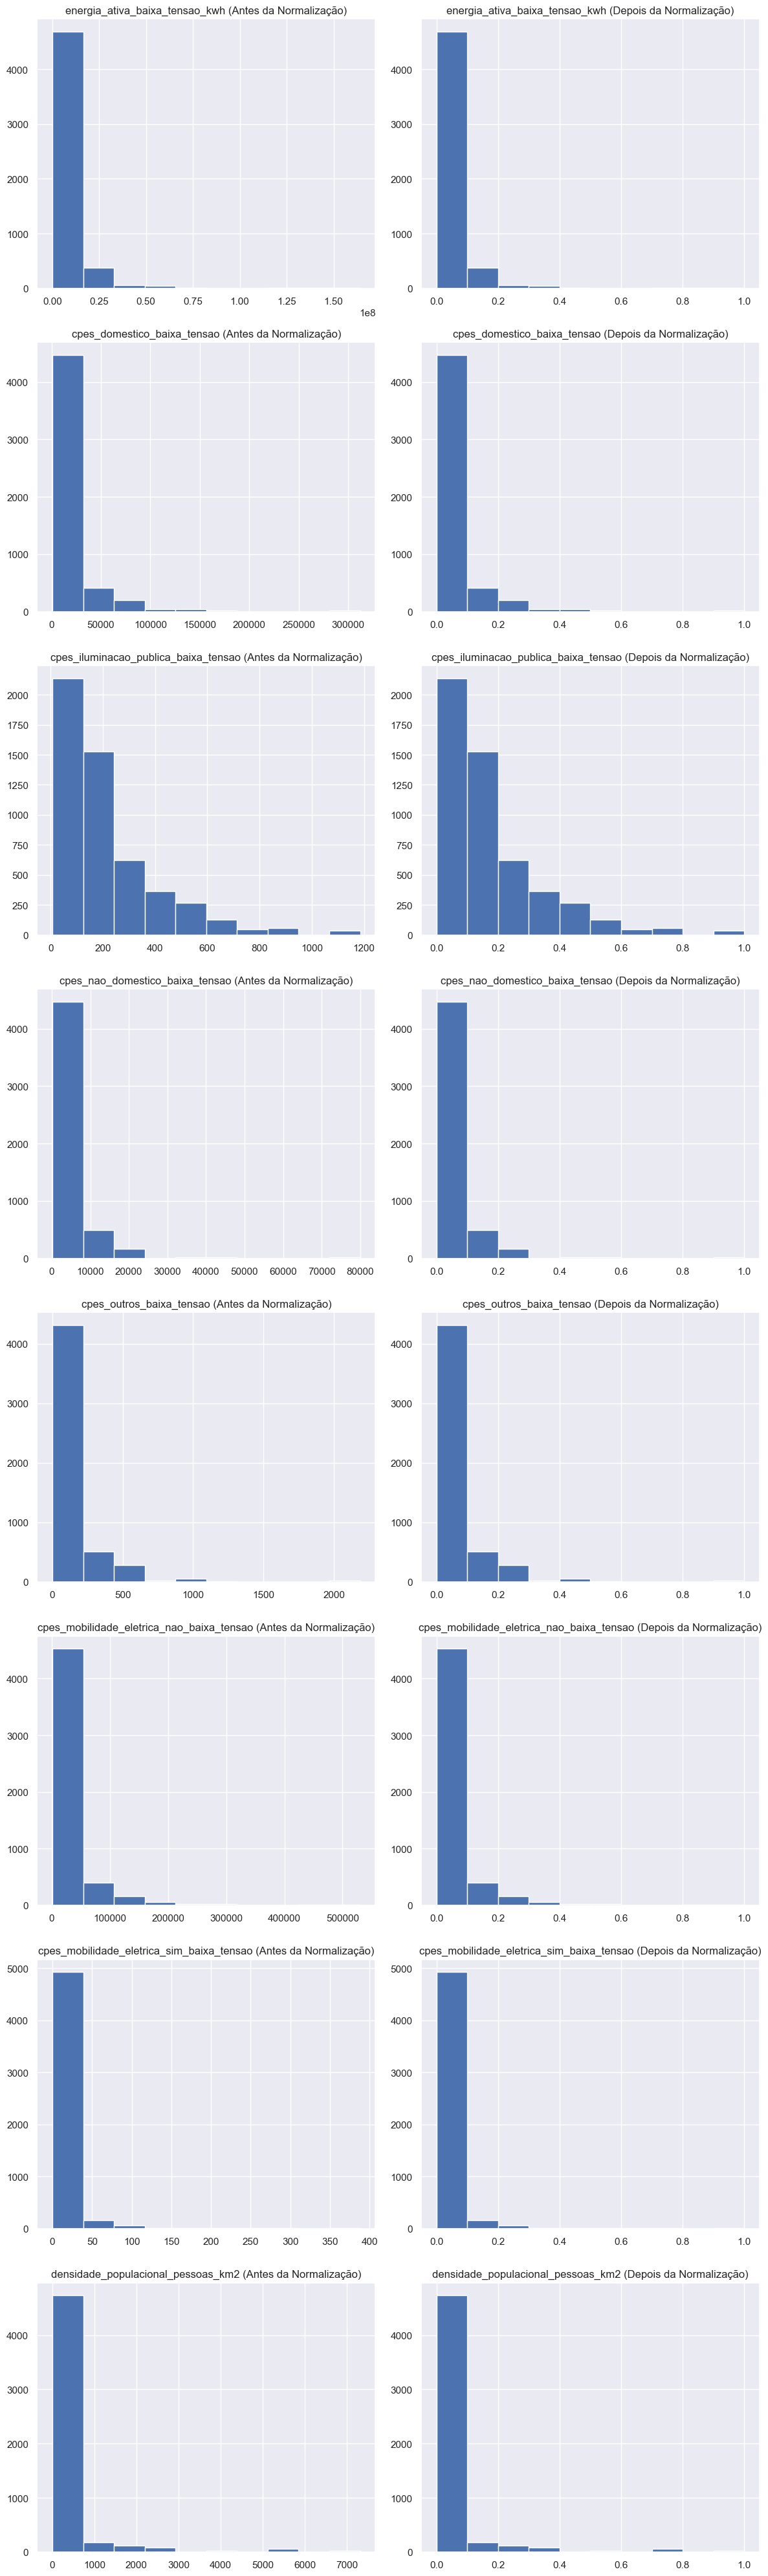

In [91]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(baixa_tensao_df.columns), ncols=2, figsize=(12, 40))

num_bins = 10
# Histogramas antes da normalização
for i, col in enumerate(baixa_tensao_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=num_bins)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(baixa_tensao_scaled_min_max_df.columns):
    baixa_tensao_scaled_min_max_df[col].hist(ax=axes[i, 1], bins=num_bins)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()


# Ver se normalização decimal scaling vale a pena ou não

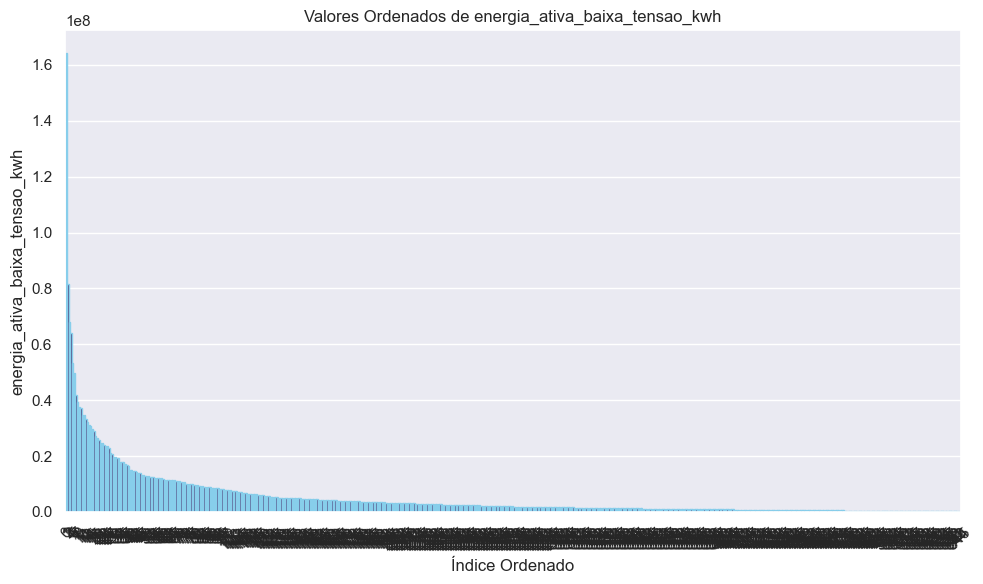

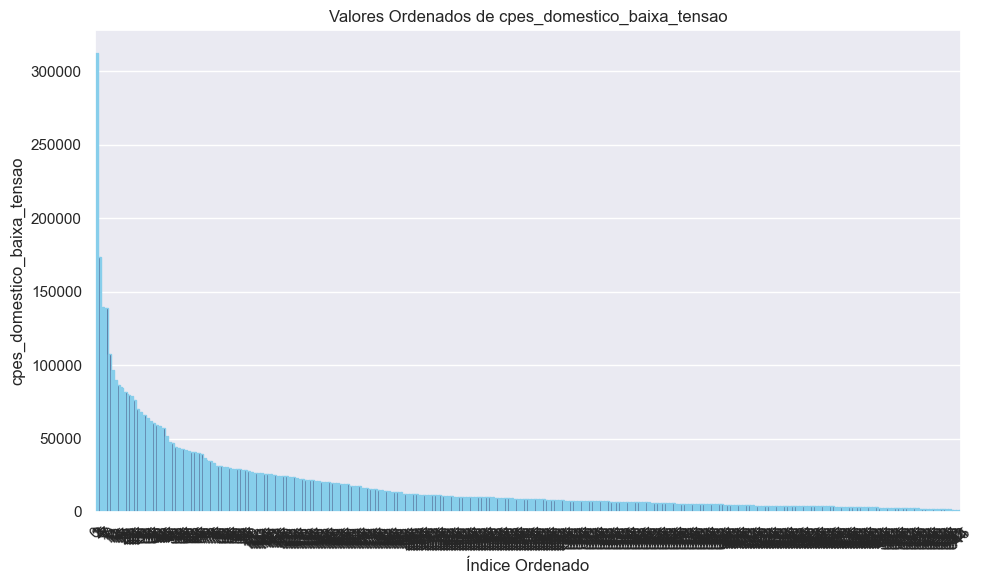

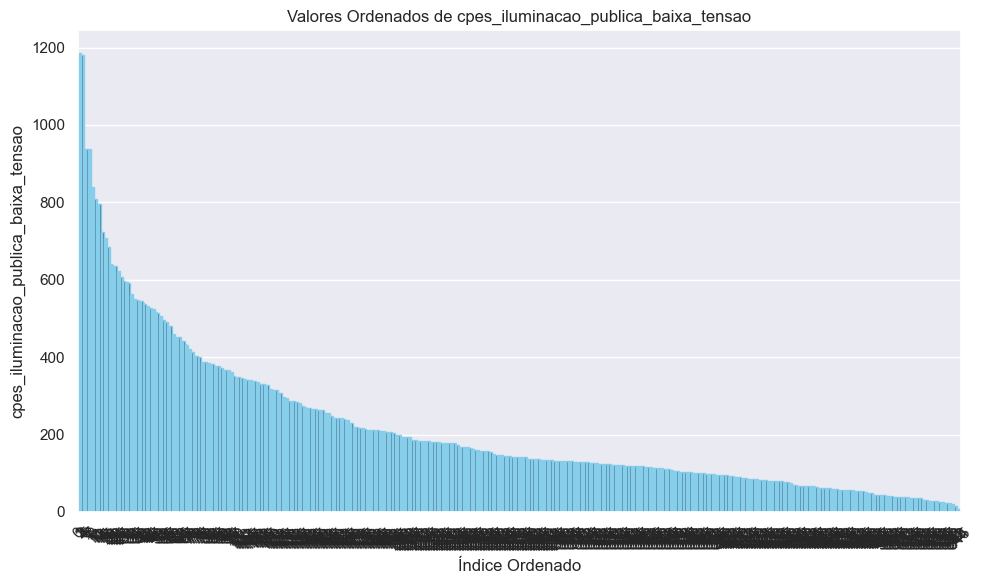

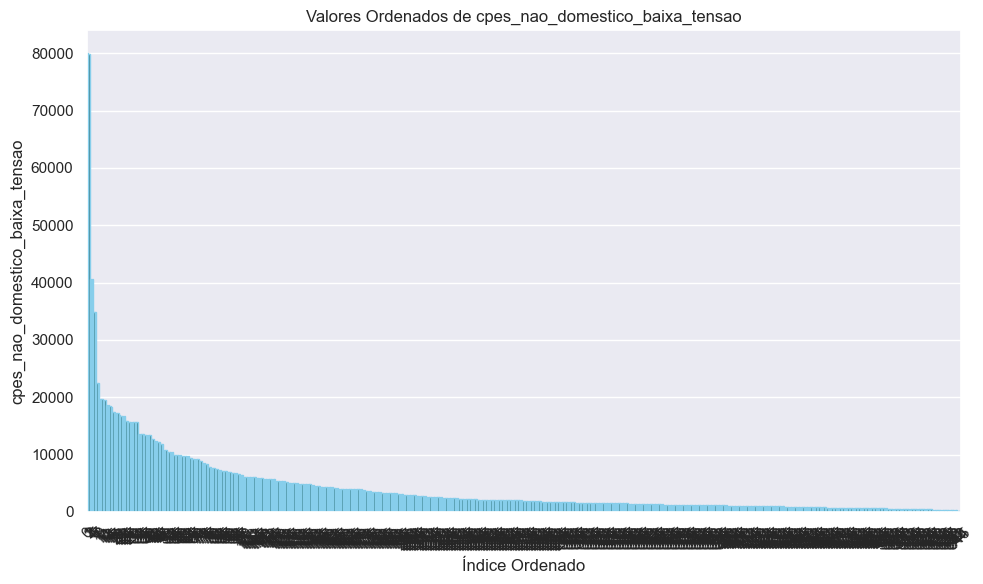

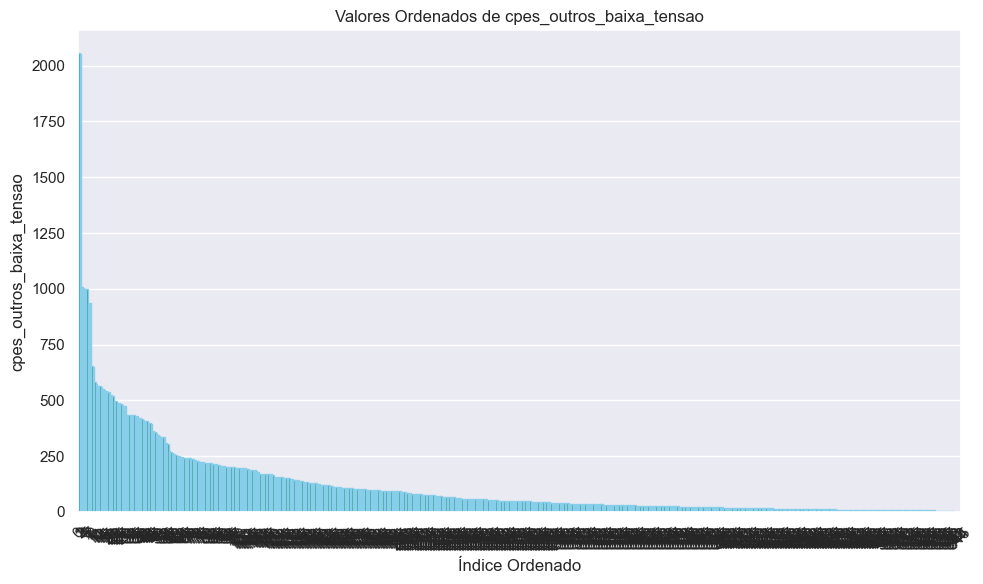

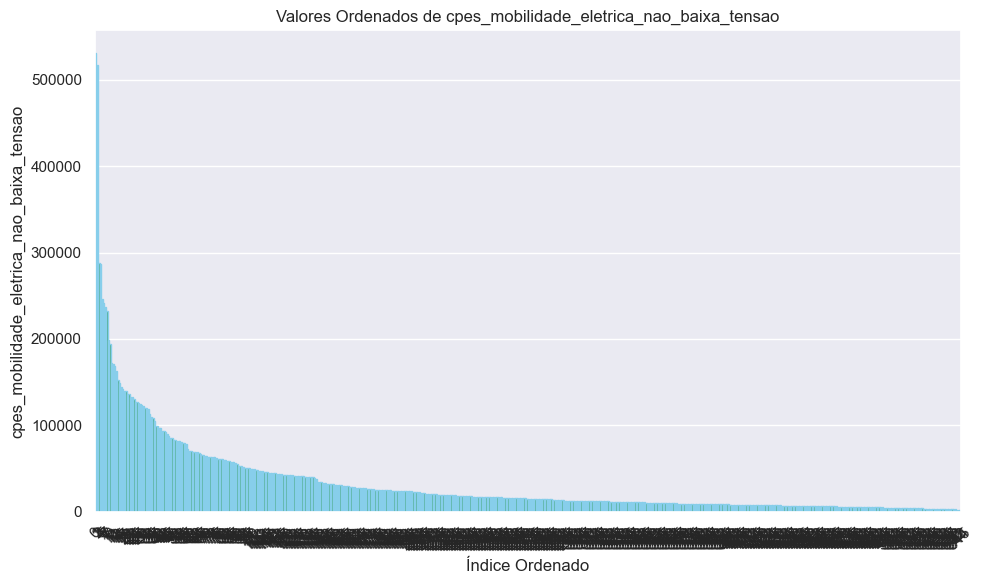

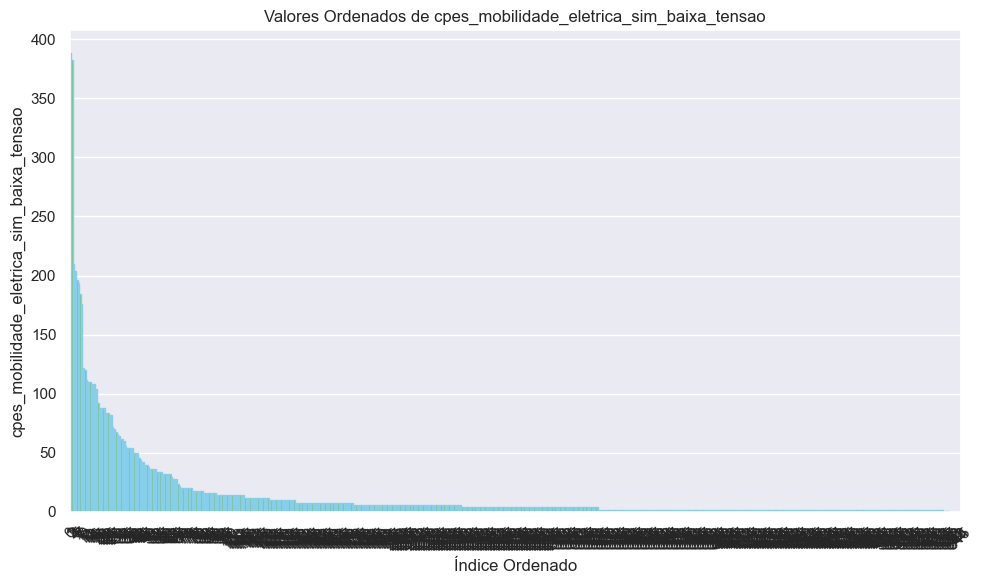

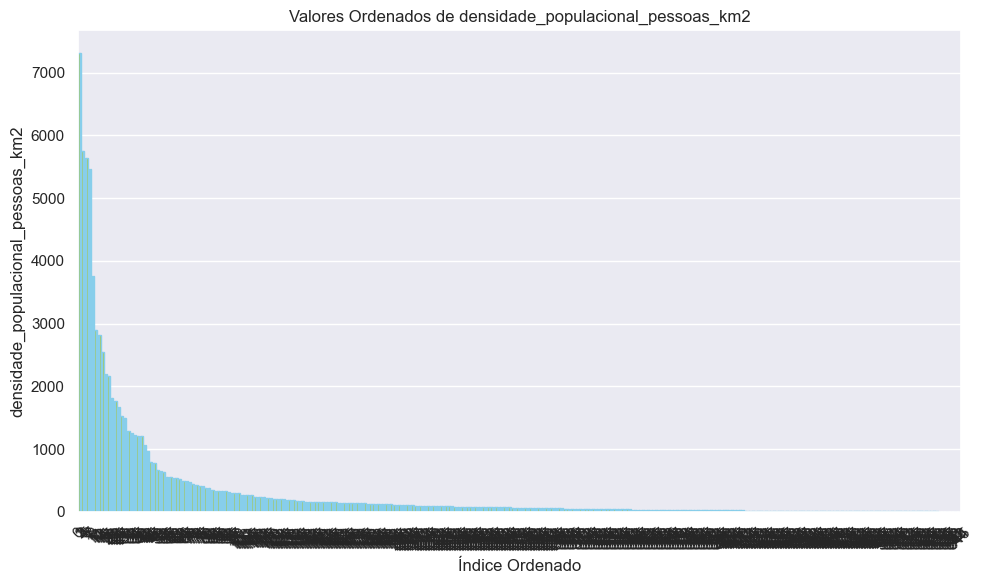

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

custom_palette = sns.color_palette("viridis", len(baixa_tensao_2024_df.columns))

for i, column in enumerate(baixa_tensao_2024_df.columns):
    sorted_values = sorted(baixa_tensao_2024_df[column], reverse=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(range(len(sorted_values))), y=sorted_values, color=custom_palette[i], edgecolor='skyblue')  
    
    plt.title(f'Valores Ordenados de {column}')
    plt.xlabel('Índice Ordenado')
    plt.ylabel(column)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()  
    plt.show()


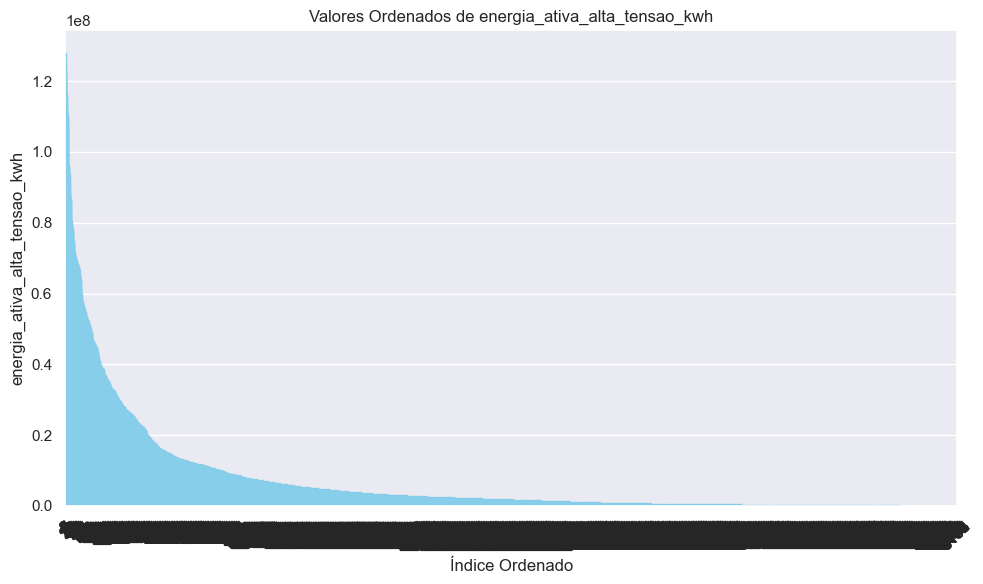

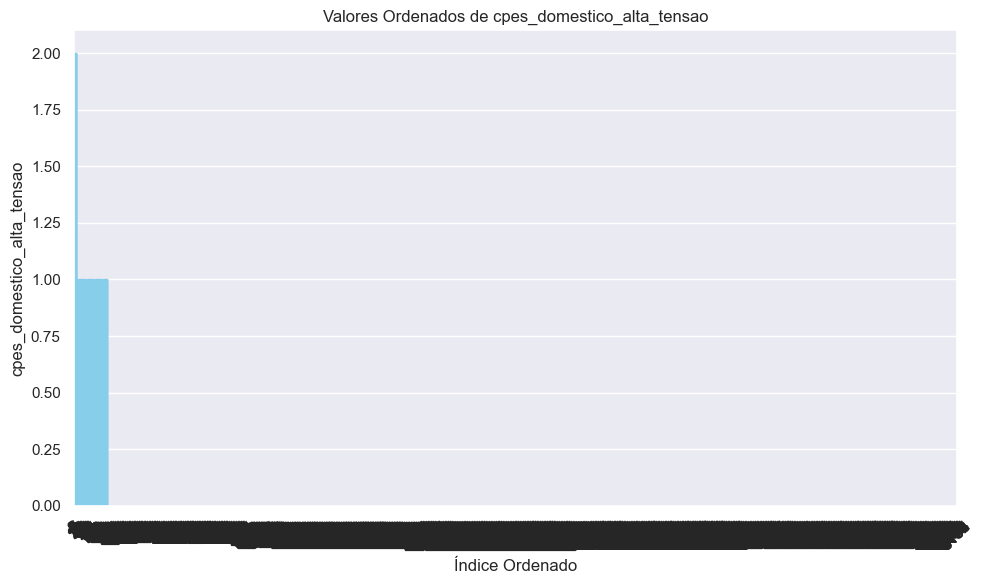

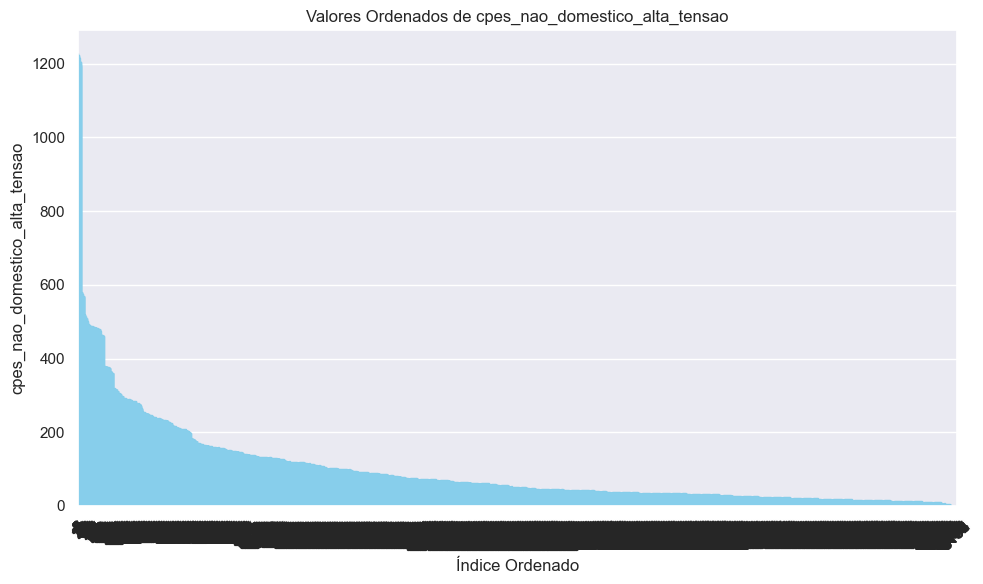

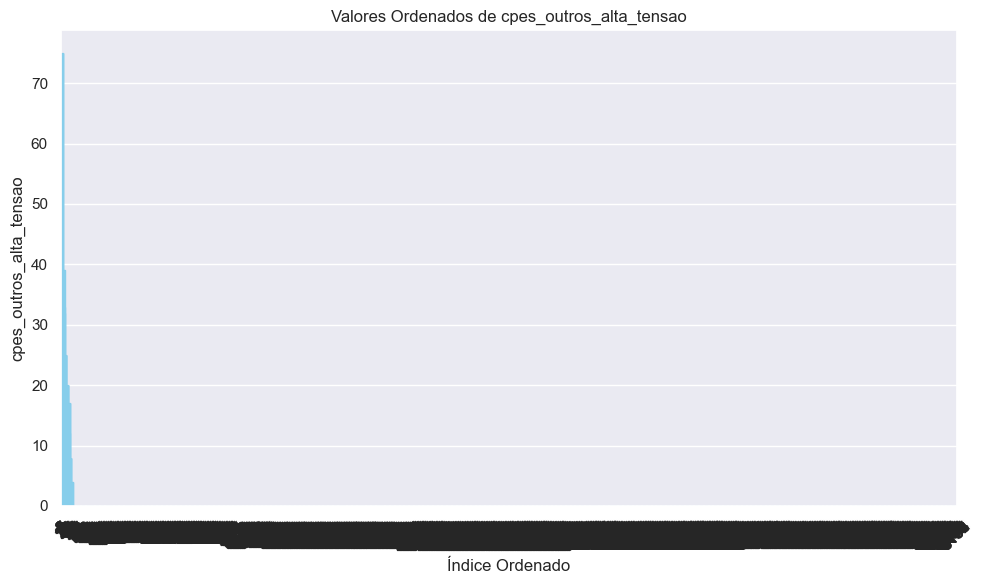

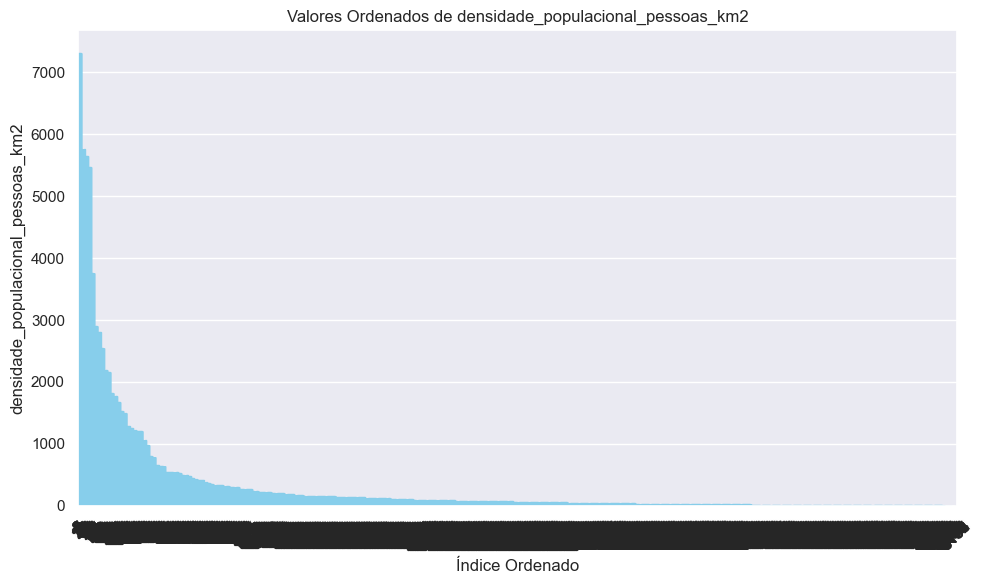

In [93]:
custom_palette = sns.color_palette("viridis", len(alta_tensao_df.columns))

for i, column in enumerate(alta_tensao_df.columns):
    sorted_values = sorted(alta_tensao_df[column], reverse=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(range(len(sorted_values))), y=sorted_values, color=custom_palette[i], edgecolor='skyblue')  # Escolha da cor de borda
    
    plt.title(f'Valores Ordenados de {column}')
    plt.xlabel('Índice Ordenado')
    plt.ylabel(column)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout() 
    plt.show()
